In [ ]:
!pip install snscrape
!pip install textblob
!pip install panda
!pip install emoji==1.7
!pip install emot
!pip install demoji
!pip install pyspellchecker
!pip install text2emotion

%config IPCompleter.greedy=True
import snscrape
from textblob import TextBlob
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7255 sha256=48ce1c6b8760e374c9da59465b709e879ed12c08742a6e7d1511fd03c5563dce
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha25

In [ ]:
topic=input("Enter Topic to be searched : ")
input_size=int(input("Enter no of tweets to be fetched : "))
!snscrape --jsonl --max-results  $input_size twitter-hashtag $topic > user-tweets.json

Enter Topic to be searched : alpha
Enter no of tweets to be fetched : 12
2023-05-07 22:31:26.874  ERROR  snscrape.base  Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%23alpha&tweet_search_mode=live&count=20&query_source=spel

In [ ]:
# Set up your API keys and tokens

!pip install tweepy

import tweepy

consumer_key = "8yl5XcjxGIUeRmVQ28Riizhs0"
consumer_secret = "lh9p50URvkhGBP7vnRkFC3Y8ft2THCC3cMoNc8R9tjZgidFmfX"
access_token = "1632257985752993792-nniLv6vgEmE2cKINiw8yF4YbAzqGhe"
access_token_secret = "sapEGTNQ5cPbdvB1v9g8glwQQIzpR5pbicANZS7poOmFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
num_tweets = int(input("Enter the number of tweets to analyze: "))
tweets = []
for tweet in tweepy.Cursor(api.user_timeline).items(num_tweets):
    tweets.append(tweet.text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Forbidden: ignored

In [ ]:
import pandas as pd
import numpy as np
import nltk

# For lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# For removing stop words
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# For removing accents
import unicodedata

# For transforming the emojis into their description
import demoji
demoji.download_codes()


# For spellchecking 
from spellchecker import SpellChecker


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-3-d4dfd9a9bf13>:19: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
import re
lemmatizer = WordNetLemmatizer()
def remove_hashtags_text(text):
  return re.sub(r"#(\w+)", ' ', text, flags=re.MULTILINE)
  
def remove_mentions_text(text):
  return re.sub(r"@(\w+)", ' ', text, flags=re.MULTILINE)
def remove_accents(text):
    unaccented_text = ''.join((char for char in unicodedata.normalize('NFD', text) if unicodedata.category(char) != 'Mn'))
    return unaccented_text
def convert_emojis(text):
  emoticon_dic = demoji.findall(text)
  for emot, value in emoticon_dic.items():
    text = text.replace(emot, value.lower().replace(" ", "_") + " ")
  return text

def lemmatize_text(text):
  lemmatized_text = " ".join([lemmatizer.lemmatize(word, pos="v") for word in text.split(" ")])
  return lemmatized_text

# user defined function for doing several work
def processing(text):
  text=remove_hashtags_text(text)
  text=remove_hashtags_text(text)
  text=convert_emojis(text)
  text=lemmatize_text(text)
  text=remove_accents(text)
  
  return text


[59.86, 22.84, 17.3] ['positive', 'negative', 'neutral']


NameError: ignored

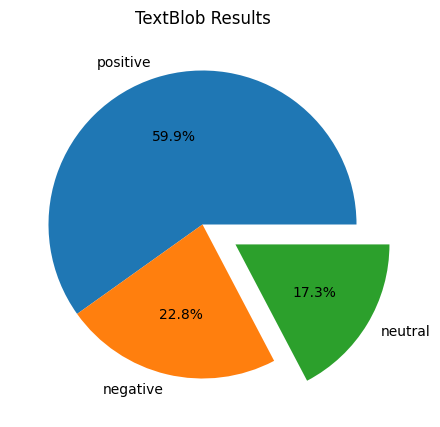

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.title("TextBlob Results")

tweets_df=pd.read_json("user-tweets.json",lines=True)
tweets=tweets_df[["rawContent","timeStamp"]]

sentiment_list=[]

for tweet in tweets["rawContent"]:
    " ".join(tweet.split())
    tweet=processing(tweet)
    
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    sentiment_list.append(sentiment)
tweets["sentimentValue"]=sentiment_list
polarity=["positive",0,"negative",0,"neutral",0]

for a in sentiment_list:
  if a >0:
    polarity[1]+=1
  if a<0:
    polarity[3]+=1
    if a==0:
      polarity[5]+=1
  
print(polarity[1:6:2],labels=polarity[0:5:2])
plt.pie(polarity[1:6:2],labels=polarity[0:5:2], explode=(0,0,0,25))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
tweets_df=pd.read_json("user-tweets.json",lines=True)
tweets=tweets_df[["rawContent","timeStamp"]]
import text2emotion as tte
emotion_list=[]
for tweet in tweets["rawContent"]:
   " ".join(tweet.split())
   tweet=processing(tweet)
   emotion_list.append(tte.get_emotion(tweet))

happyList,sadList,angryList,surpriseList,fearList=np.zeros(input_size),np.zeros(input_size),np.zeros(input_size),np.zeros(input_size),np.zeros(input_size)

for a in range(input_size):
  happyList[a],sadList[a],fearList[a]=emotion_list[a]["Happy"],emotion_list[a]["Sad"],emotion_list[a]["Fear"]
  surpriseList[a],angryList[a]= emotion_list[a]["Surprise"],emotion_list[a]["Angry"]
tweets["Happy"]=happyList
tweets["Sad"]=sadList
tweets["Fear"]=fearList
tweets["Surprise"]=surpriseList
tweets["Angry"]=angryList
print(polarity[1:6:2],polarity[0:5:2])
plt.bar(polarity[0:9:2],polarity[1:10:2])


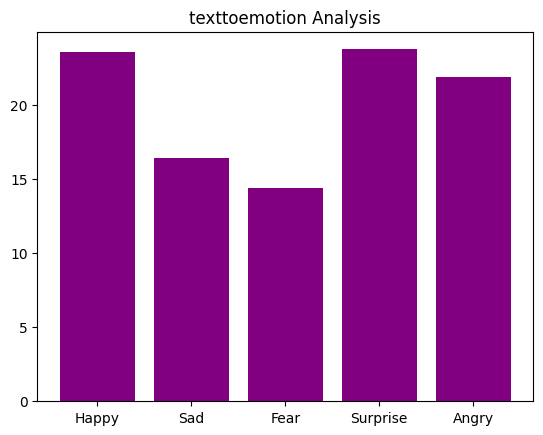

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("texttoemotion Analysis")
plt.bar(polarity[0:9:2],polarity[1:10:2],color=("purple"))
plt.show()

In [ ]:
tweets.head(input_size)

,rawContent,username,sentimentValue,Happy,Sad,Fear,Surprise,Angry
0,#Download My Kill #Coronavirus On Contact #Rec...,MssDidi,0.000000,0.0,0.0,0.0,1.0,0.0
1,@PMalinauskasMP @BelindaJones68 @AFL Gather an...,GrantAvery6,-0.250000,0.0,0.5,0.5,0.0,0.0
2,Covid #COVID19 ⬇️ #BillGates #Soros #WEF #TheG...,Karla_Delfoix,0.000000,0.0,0.0,0.0,0.0,0.0
3,#dictaturemacron #Assassin #COVID19 #PasDeRetr...,Guillau76711055,0.000000,0.0,0.0,0.0,0.0,0.0
4,"¡Juntos Y Unidos, VS El Coronavirus #Covid19 H...",ferspeed2609,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,"In the USA, incentives to vax people. Probably...",pietello,0.000000,0.0,0.0,1.0,0.0,0.0
96,Coronavirus Covid-19 World Map for New Cases ...,_Covid19_World_,0.318182,0.0,0.0,1.0,0.0,0.0
97,छत्तीसगढ़ में लगातार कोरोना तेजी से पैर पसार र...,saharasamaympcg,0.000000,0.0,0.0,0.0,0.0,0.0
98,"India Reports 10,093 New #COVID19 Cases, Activ...",GulistanNewsTV,0.001515,0.0,0.0,1.0,0.0,0.0
